In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [8]:
with open('salaryData.json') as f:
    data = json.load(f)

dataset = pd.DataFrame(data)

# columns not used in model
columns = ['timestamp', 'otherdetails', 'dmaid', 'rowNumber', 
            'company', 'cityid',
           'level', 'tag', 'bonus', 'basesalary', 'stockgrantvalue'] # TODO: consider adding these to model
dataset.drop(columns, inplace=True, axis=1)
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)
dataset

,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender
0,Product Manager,127,"Redwood City, CA",1.5,1.5,
1,Software Engineer,100,"San Francisco, CA",5,3,
2,Product Manager,310,"Seattle, WA",8,0,
3,Software Engineering Manager,200,"Redmond, WA",9,9,
4,Software Engineer,173,"Vancouver, BC, Canada",11,1,
...,...,...,...,...,...,...
31773,Software Engineer,195,"Santa Monica, CA",3,1,
31774,Hardware Engineer,151,"San Diego, CA",3,3,
31775,Data Scientist,161,"New York, NY",4,2,Male
31776,Product Designer,397,"San Francisco, CA",7,7,Female


In [9]:
dataset["totalyearlycompensation"] = pd.to_numeric(dataset["totalyearlycompensation"])
# dataset["yearsofexperience"] = pd.to_numeric(dataset["yearsofexperience"])
# dataset["yearsatcompany"] = pd.to_numeric(dataset["yearsatcompany"])
# filter out rows with no gender information
dataset = dataset[dataset.gender != ""]
# get rid of outliers
# dataset = dataset[dataset["totalyearlycompensation"] < dataset["totalyearlycompensation"].quantile(.96)]
# filter out cities with less than 100 datapoints
dataset_top_cities = dataset.groupby('location').filter(lambda x: len(x) >= 50)

In [10]:
# categorical data
# categorical_cols = ['title', 'location'] 

# one hot encoding
# dataset_encoded = pd.get_dummies(dataset_top_cities, columns = categorical_cols, drop_first = True)
# dataset_encoded

In [23]:
# multivariate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# independent and dependent variables
features = ['yearsofexperience', 'location', 'title','yearsatcompany', 'gender']
target = 'totalyearlycompensation'

X = dataset_top_cities[features]
Y = dataset_top_cities[target]

In [24]:
# convert categorical variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# print(X)

# # 80/20 split- 20% training data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [25]:
# define model I am using
model = Lasso()

In [26]:
# training process
model.fit(X_train,Y_train)

Lasso()

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
# get model performance
def scores_(model,X,Y):
    y_predict = model.predict(X)
    rmse = (np.sqrt(mean_squared_error(Y, y_predict)))
    r2 = r2_score(Y, y_predict)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
print("The model performance of training set")
scores_(model,X_train,Y_train)
print("--------------------------------------")
print("The model performance of testing set")
scores_(model,X_test,Y_test)

The model performance of training set
RMSE is 133.05147298954654
R2 score is 0.2329849834534956
--------------------------------------
The model performance of testing set
RMSE is 104.25207043438579
R2 score is 0.292736119382638


/Users/shiyuezhang/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalyearlycompensation'>

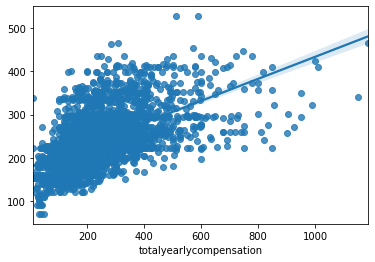

In [28]:
# compare the prediction with actual values in test dataset
predictions = model.predict(X_test)
sns.regplot(Y_test,predictions)

In [11]:
# mean absolute value for training data
data = Y_train
predict = model.predict(X_train)
training_error = mean_absolute_error(data, predict)

In [12]:
# mean absolute value for test data
test_data = Y_test
predict_data = model.predict(X_test)
test_data_error = mean_absolute_error(data, predict)

In [155]:
# we need some metric to measure the accuracy of our regression model
from sklearn.metrics import r2_score

# on training data
true_value = Y_train
predicted_val = model.predict(X_train)
accuracy = r2_score(true_value, predicted_val)

In [157]:
# on test data
true_value2 = Y_test
predicted_val2 = model.predict(X_test)
accuracy2 = r2_score(true_value2, predicted_val2)

In [158]:
print('This model accounts for {}% of the training data with mean data error of {}'.format(round(accuracy2*100,2), round(training_error,2)))
print('This model accounts for {}% of the testing data with mean data error of {}'.format(round(accuracy*100,2), round(test_data_error,2)))

This model accounts for -1.8218516691429687e+20% of the training data with mean data error of 66.42
This model accounts for 39.49% of the testing data with mean data error of 66.42
